In [3]:
import pandas as pd
from io import BytesIO
import zipfile
import matplotlib.pyplot as plt 

In [4]:
zip_path = "C:/PRASAD wORKS/Python Works/Final Intellipaat - Submission/Python/Projects/Project - NamesTrends/names.zip"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as z:
    # Extract only files that consist of useful data
    useful_files = [file for file in z.namelist() if file.endswith('.txt')]

    # Create a DataFrame to store the combined data
    df = pd.DataFrame()

    # Read each useful file and append to the DataFrame
    for file_name in useful_files:
        data = pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8', engine='python', header=None)
        df = pd.concat([df, data], ignore_index=True)


# Visualize the number of male and female babies born in a particular year
df.columns = ['Name', 'Gender', 'Year']


# Find out popular baby names (top 100)
top_names = df['Name'].value_counts().nlargest(100)
print("Top 10 Popular Baby Names:")
print(top_names.head(10))

Top 10 Popular Baby Names:
Name
Jean       286
Lee        286
John       286
Leslie     286
Joseph     286
William    286
James      286
Tommie     286
Marion     286
Jessie     286
Name: count, dtype: int64


In [5]:
df.head()


,Name,Gender,Year
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


<Figure size 1400x800 with 0 Axes>

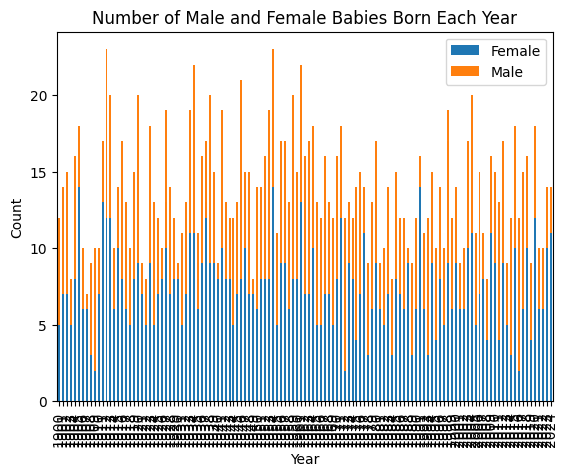

In [6]:
df = df[df['Year'].astype(float).between(1900, pd.to_datetime('today').year)]

# Visualize the number of male and female babies born in each year
gender_counts = df.groupby(['Year', 'Gender']).size().unstack()

# Plotting
plt.figure(figsize=(14, 8))
gender_counts.plot(kind='bar', stacked=True)
plt.title('Number of Male and Female Babies Born Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xlim()
plt.show()


<Figure size 1400x800 with 0 Axes>

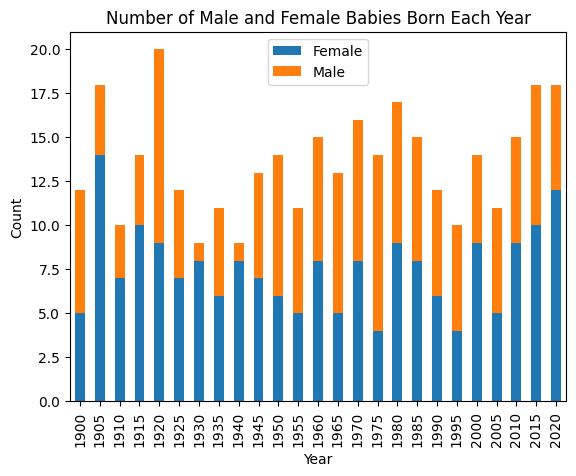

In [7]:
df = df[df['Year'].astype(float).between(1900, pd.to_datetime('today').year)]

# Visualize the number of male and female babies born in each year
gender_counts = df.groupby(['Year', 'Gender']).size().unstack()

# Plotting with every nth year
n = 5  # Adjust this value to display every nth year
plt.figure(figsize=(14, 8))
gender_counts.iloc[::n].plot(kind='bar', stacked=True)
plt.title('Number of Male and Female Babies Born Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()


In [8]:
print(gender_counts)

Gender   F  M
Year         
1900     5  7
1901     7  7
1902     7  8
1903     5  3
1904     8  8
...     .. ..
2020    12  6
2021     6  4
2022     6  4
2023    10  4
2024    11  3

[125 rows x 2 columns]
